In [2]:
import pandas as pd

In [3]:
import numpy as np

In [9]:
data=pd.read_csv("/Users/Vikash/Desktop/project/car+evaluation/car.data",header=None,names=['buying','maint','doors','person','lug_bout','safety','class'])

In [10]:
data.head()

,buying,maint,doors,person,lug_bout,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_bout  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
data.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_bout    0
safety      0
class       0
dtype: int64

In [13]:
classes,count=np.unique(data["class"],return_counts=True)
print(dict(zip(map(str,classes),map(str,count))))

{'acc': '384', 'good': '69', 'unacc': '1210', 'vgood': '65'}


In [14]:
features=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [32]:
features.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_bout', 'safety'], dtype='object')

In [16]:
features

,buying,maint,doors,person,lug_bout,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [18]:
features.shape

(1728, 6)

In [19]:
features_cat=pd.get_dummies(features,drop_first=True)

In [20]:
features_cat

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,person_4,person_more,lug_bout_med,lug_bout_small,safety_low,safety_med
0,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(features_cat,target,test_size=0.2,random_state=0,shuffle=True)

In [25]:
X_train.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,person_4,person_more,lug_bout_med,lug_bout_small,safety_low,safety_med
1649,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False
1465,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
361,False,False,True,True,False,False,True,False,False,True,False,False,True,False,True
315,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False
1372,True,False,False,False,False,True,False,True,False,False,True,True,False,False,True


In [26]:
train_data=pd.concat([X_train,y_train],axis="columns")

In [28]:
train_data.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,person_4,person_more,lug_bout_med,lug_bout_small,safety_low,safety_med,class
1649,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,unacc
1465,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,unacc
361,False,False,True,True,False,False,True,False,False,True,False,False,True,False,True,unacc
315,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False,unacc
1372,True,False,False,False,False,True,False,True,False,False,True,True,False,False,True,acc


In [30]:
train_data.describe()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,person_4,person_more,lug_bout_med,lug_bout_small,safety_low,safety_med,class
count,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,unacc
freq,1037,1041,1035,1021,1047,1051,1045,1029,1032,927,920,916,923,912,933,970


In [33]:
corr_mat=train_data.corr(method="pearson",numeric_only=True)

In [34]:
corr_mat

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,person_4,person_more,lug_bout_med,lug_bout_small,safety_low,safety_med
buying_low,1.000000,-0.330120,-0.333976,-0.015677,0.013152,-0.002469,0.011182,-0.015803,0.006254,-0.005640,-0.011812,-0.011781,0.001477,-0.004694,0.003257
buying_med,-0.330120,1.000000,-0.331395,-0.011747,-0.002582,0.013087,-0.012323,-0.004236,-0.005250,-0.004530,0.010689,-0.014140,0.016908,0.014279,-0.013575
buying_vhigh,-0.333976,-0.331395,1.000000,0.016554,-0.008230,0.003483,0.001493,0.005230,0.000461,0.002685,0.017681,0.007039,-0.004422,-0.000036,0.000936
maint_low,-0.015677,-0.011747,0.016554,1.000000,-0.336349,-0.333698,0.015230,-0.023452,0.002176,-0.006495,0.011587,-0.006015,-0.010135,-0.023543,0.009546
maint_med,0.013152,-0.002582,-0.008230,-0.336349,1.000000,-0.317440,-0.002712,0.009416,0.000618,-0.004646,0.014353,0.025146,-0.008112,-0.006876,-0.010234
maint_vhigh,-0.002469,0.013087,0.003483,-0.333698,-0.317440,1.000000,-0.006768,0.005652,-0.014923,0.003694,-0.005940,-0.012949,0.018236,0.026596,-0.016432
doors_3,0.011182,-0.012323,0.001493,0.015230,-0.002712,-0.006768,1.000000,-0.332611,-0.330713,-0.003412,0.019080,0.019127,-0.003316,0.019175,-0.012552
doors_4,-0.015803,-0.004236,0.005230,-0.023452,0.009416,0.005652,-0.332611,1.000000,-0.341094,-0.000774,-0.010577,-0.000102,0.002674,-0.024694,0.011738
doors_5more,0.006254,-0.005250,0.000461,0.002176,0.000618,-0.014923,-0.330713,-0.341094,1.000000,-0.004361,-0.000015,-0.000061,-0.014996,-0.003619,0.008129
person_4,-0.005640,-0.004530,0.002685,-0.006495,-0.004646,0.003694,-0.003412,-0.000774,-0.004361,1.000000,-0.496470,-0.020919,0.029038,0.010597,0.013724


In [35]:
import matplotlib.pyplot as plt

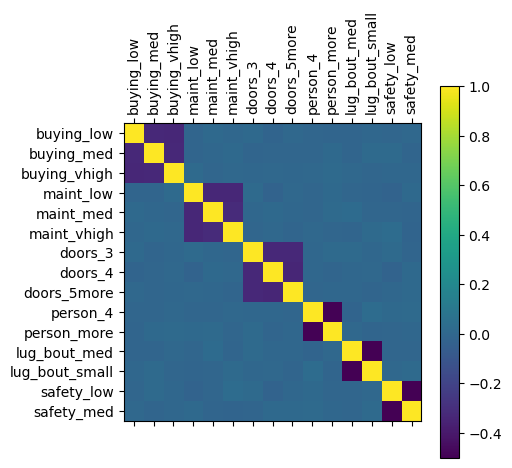

In [38]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat)),corr_mat.columns)
plt.colorbar()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier(criterion="entropy",random_state=42)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [42]:
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)



In [43]:
from sklearn.metrics import f1_score,confusion_matrix

In [45]:
F1_score_train=f1_score(y_train,y_pred_train,average="weighted")
confusion_train=confusion_matrix(y_train,y_pred_train)
print("F1 Score train :",F1_score_train)
print("Confusion_matrix):",confusion_train)

F1 Score train : 1.0
Confusion_matrix): [[305   0   0   0]
 [  0  52   0   0]
 [  0   0 970   0]
 [  0   0   0  55]]


In [46]:
F1_score_test=f1_score(y_test,y_pred,average="weighted")
confusion_test=confusion_matrix(y_test,y_pred)
print("F1 Score train :",F1_score_test)
print("Confusion_matrix):",confusion_test)

F1 Score train : 0.8822025543511693
Confusion_matrix): [[ 60   4  15   0]
 [  8   7   0   2]
 [  6   0 234   0]
 [  4   0   0   6]]


In [47]:
model_1=RandomForestClassifier(criterion="entropy",random_state=42,n_estimators=80,min_samples_split=12,ccp_alpha=0.001)

In [48]:
model_1.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy',
                       min_samples_split=12, n_estimators=80, random_state=42)

In [49]:
y_pred_train_1=model_1.predict(X_train)
y_pred_1=model_1.predict(X_test)

In [50]:
F1_score_train=f1_score(y_train,y_pred_train_1,average="weighted")
confusion_train=confusion_matrix(y_train,y_pred_train_1)
print("F1 Score train :",F1_score_train)
print("Confusion_matrix):",confusion_train)

F1 Score train : 0.9222096395818017
Confusion_matrix): [[281   0  23   1]
 [ 29  11  10   2]
 [ 12   0 958   0]
 [ 18   0   0  37]]


In [51]:
F1_score_test=f1_score(y_test,y_pred_1,average="weighted")
confusion_test=confusion_matrix(y_test,y_pred_1)
print("F1 Score train :",F1_score_test)
print("Confusion_matrix):",confusion_test)

F1 Score train : 0.8309196867492293
Confusion_matrix): [[ 55   2  22   0]
 [ 15   0   0   2]
 [  5   0 235   0]
 [  5   0   0   5]]


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
pram={
    'n_estimators':[40,60,80,100,200,300,400,500],
    'max_depth':[4,5,6,7,8,9,10,11,12],
    'criterion':["gini","entropy"]
}

In [55]:
cv_rfc=GridSearchCV(estimator=model,param_grid=pram,cv=5)
cv_rfc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [40, 60, 80, 100, 200, 300, 400, 500]})

In [56]:
cv_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [57]:
model_2=RandomForestClassifier(criterion="entropy",random_state=42,max_depth=10,n_estimators=100)

In [58]:
model_2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [60]:
y_pred_train_2=model_2.predict(X_train)
y_pred_2=model_2.predict(X_test)

In [61]:
F1_score_train=f1_score(y_train,y_pred_train_2,average="weighted")
confusion_train=confusion_matrix(y_train,y_pred_train_2)
print("F1 Score train :",F1_score_train)
print("Confusion_matrix):",confusion_train)

F1 Score train : 0.9956580218424417
Confusion_matrix): [[305   0   0   0]
 [  0  51   0   1]
 [  3   0 967   0]
 [  2   0   0  53]]


In [62]:
F1_score_test=f1_score(y_test,y_pred_2,average="weighted")
confusion_test=confusion_matrix(y_test,y_pred_2)
print("F1 Score train :",F1_score_test)
print("Confusion_matrix):",confusion_test)

F1 Score train : 0.8752537523654627
Confusion_matrix): [[ 60   3  16   0]
 [  9   4   0   4]
 [  5   0 235   0]
 [  3   0   0   7]]
